# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a data story product with a data set of your choosing**. You can choose any data set you can find on the Internet or a data set related to your current line of work. 



**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have 
seen throughout the course.**

This exercise is about creating a quickly consumable product; Do **NOT** create a report or lengthy power point presentation. You can choose a **poster format** or **few slides** to tell your story (with a unique angle) from the conclusions you derive for the audience you have decided. 



Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in THIS exercise notebook** to create your visualizations, and save them under the `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, Adobe, etc.) by **pasting your visualizations and creating all necessary elements** (captions, text annotations, layout, etc.) 

4. Save your end product as a **PDF FILE** and upload it to your exercises folder (**MAKE SURE TO NAME IT L8_Exercise.pdf**)

You should start with a clear message or angle in your mind for your audience, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)** in a nice layout. Make sure to have a **clean layout** they can follow, and **enough text annotations and captions** to make your message/point clear. 


Look at the **good and bad examples** in the lab notebook and consult the links. 

You can choose any type of visualization that you believe will be most **effective** for the type of data, characteristics of the data, visual tasks, and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; **make sure to use every principle you have learned in this course.** 

---

Following is to show how to save a plot to a file: 

In [1034]:
# this is how you save a plot to a file
library(ggplot2)
library(dplyr)
library(forcats)
library(ggplot2)
library(reshape2)

Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

In [1035]:
got <- read.csv("Game_of_Thrones.csv")
got

Season_number,Episode_number,Episode_title,Directed_by,Written_by,Music_by,Cinematographed_by,Edited_by,IMDb_rating,Rotten_Tomatoes_rating,Metacritic_rating,Overall_rating,Episode_adapted_from_the_novel,Overall_episode_number,U.S_viewers_in_millions
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<int>,<dbl>
1,1,Winter Is Coming,Tim Van Patten,"David Benioff, D. B. Weiss",Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.9,100,9.1,9.333333,A Game of Thrones,1,2.22
1,2,The Kingsroad,Tim Van Patten,"David Benioff, D. B. Weiss",Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.6,100,8.9,9.166667,A Game of Thrones,2,2.20
1,3,Lord Snow,Brian Kirk,"David Benioff, D. B. Weiss",Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.5,81,8.7,8.433333,A Game of Thrones,3,2.44
1,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.6,100,9.1,9.233333,A Game of Thrones,4,2.45
1,5,The Wolf and the Lion,Brian Kirk,"David Benioff, D. B. Weiss",Ramin Djawadi,Marco Pontecorvo,Frances Parker,9.0,95,9.0,9.166667,A Game of Thrones,5,2.58
1,6,A Golden Crown,Daniel Minahan,"David Benioff, D. B. Weiss",Ramin Djawadi,Matthew Jensen,Martin Nicholson,9.1,100,9.2,9.433333,A Game of Thrones,6,2.44
1,7,You Win or You Die,Daniel Minahan,"David Benioff, D. B. Weiss",Ramin Djawadi,Matthew Jensen,Martin Nicholson,9.1,100,9.4,9.500000,A Game of Thrones,7,2.40
1,8,The Pointy End,Daniel Minahan,George R. R. Martin,Ramin Djawadi,Matthew Jensen,Martin Nicholson,8.9,95,8.9,9.100000,A Game of Thrones,8,2.72
1,9,Baelor,Alan Taylor,"David Benioff, D. B. Weiss",Ramin Djawadi,Alik Sakharov,Frances Parker,9.6,100,9.5,9.700000,A Game of Thrones,9,2.66


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

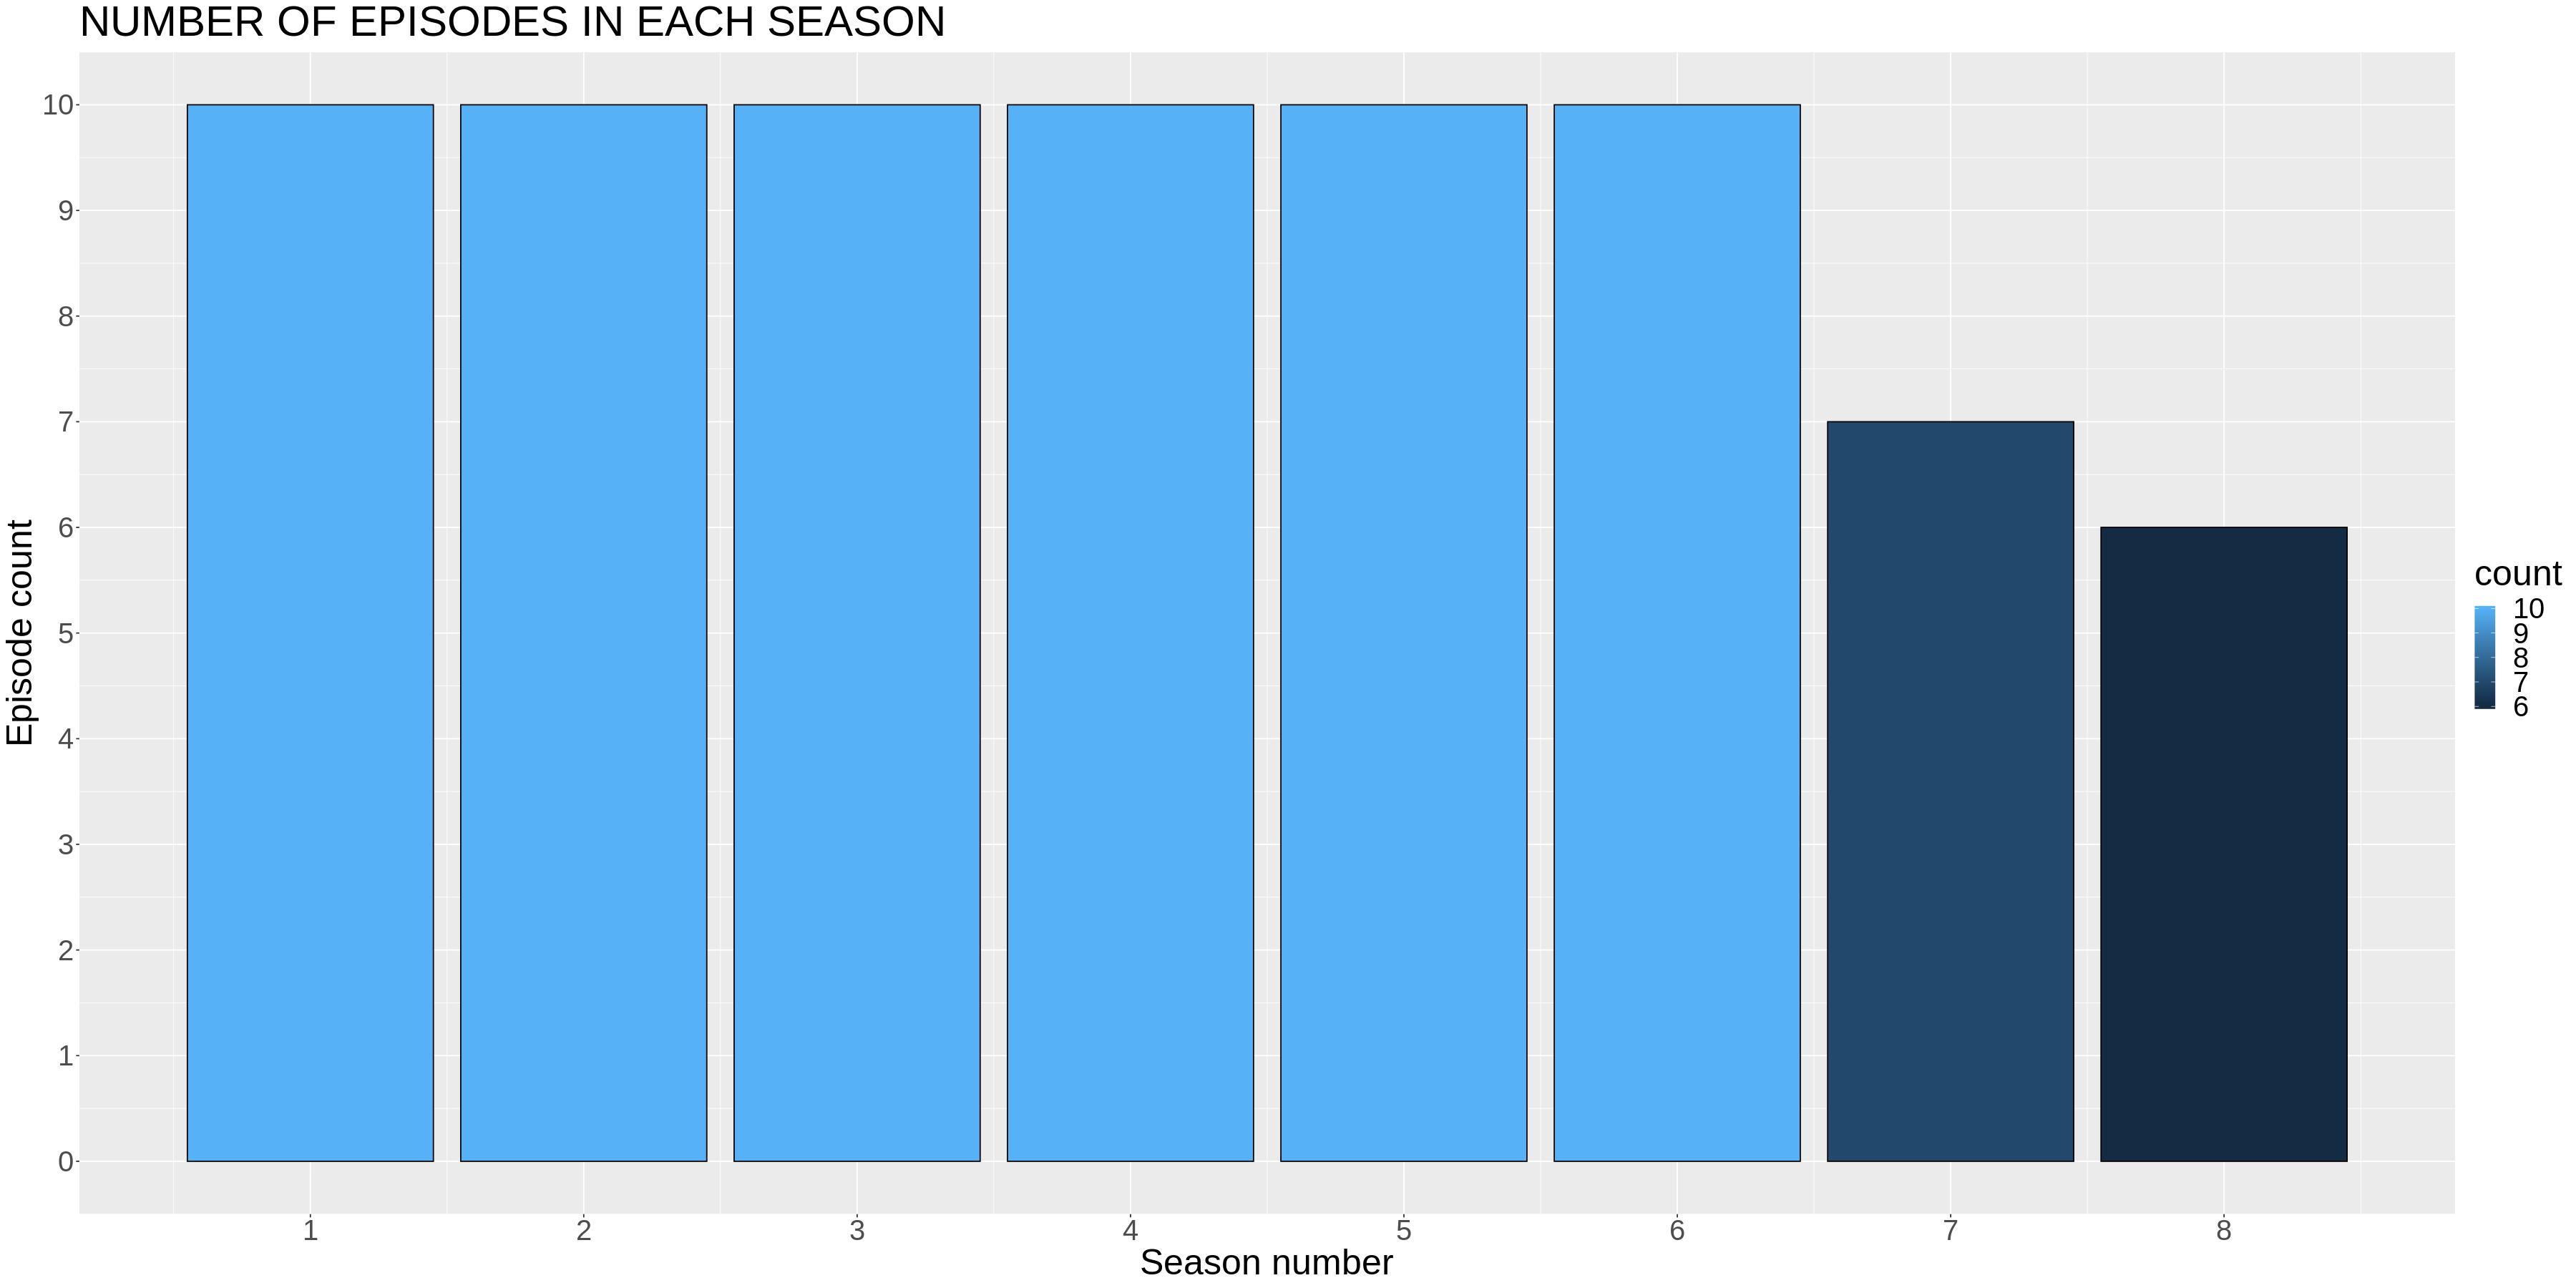

In [1036]:
options(repr.plot.width = 30, repr.plot.height = 15)
histogram1 <-got %>% 
            ggplot(aes(x=Season_number, fill = ..count..)) +
            geom_histogram(binwidth=1, stat="count", color="black") + 
            scale_x_continuous(breaks=1:8) + 
            scale_y_continuous(breaks=0:11) +
            labs(x = "Season number", y = "Episode count") +
            ggtitle("NUMBER OF EPISODES IN EACH SEASON")
histogram1 + theme(text = element_text(size = 30))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

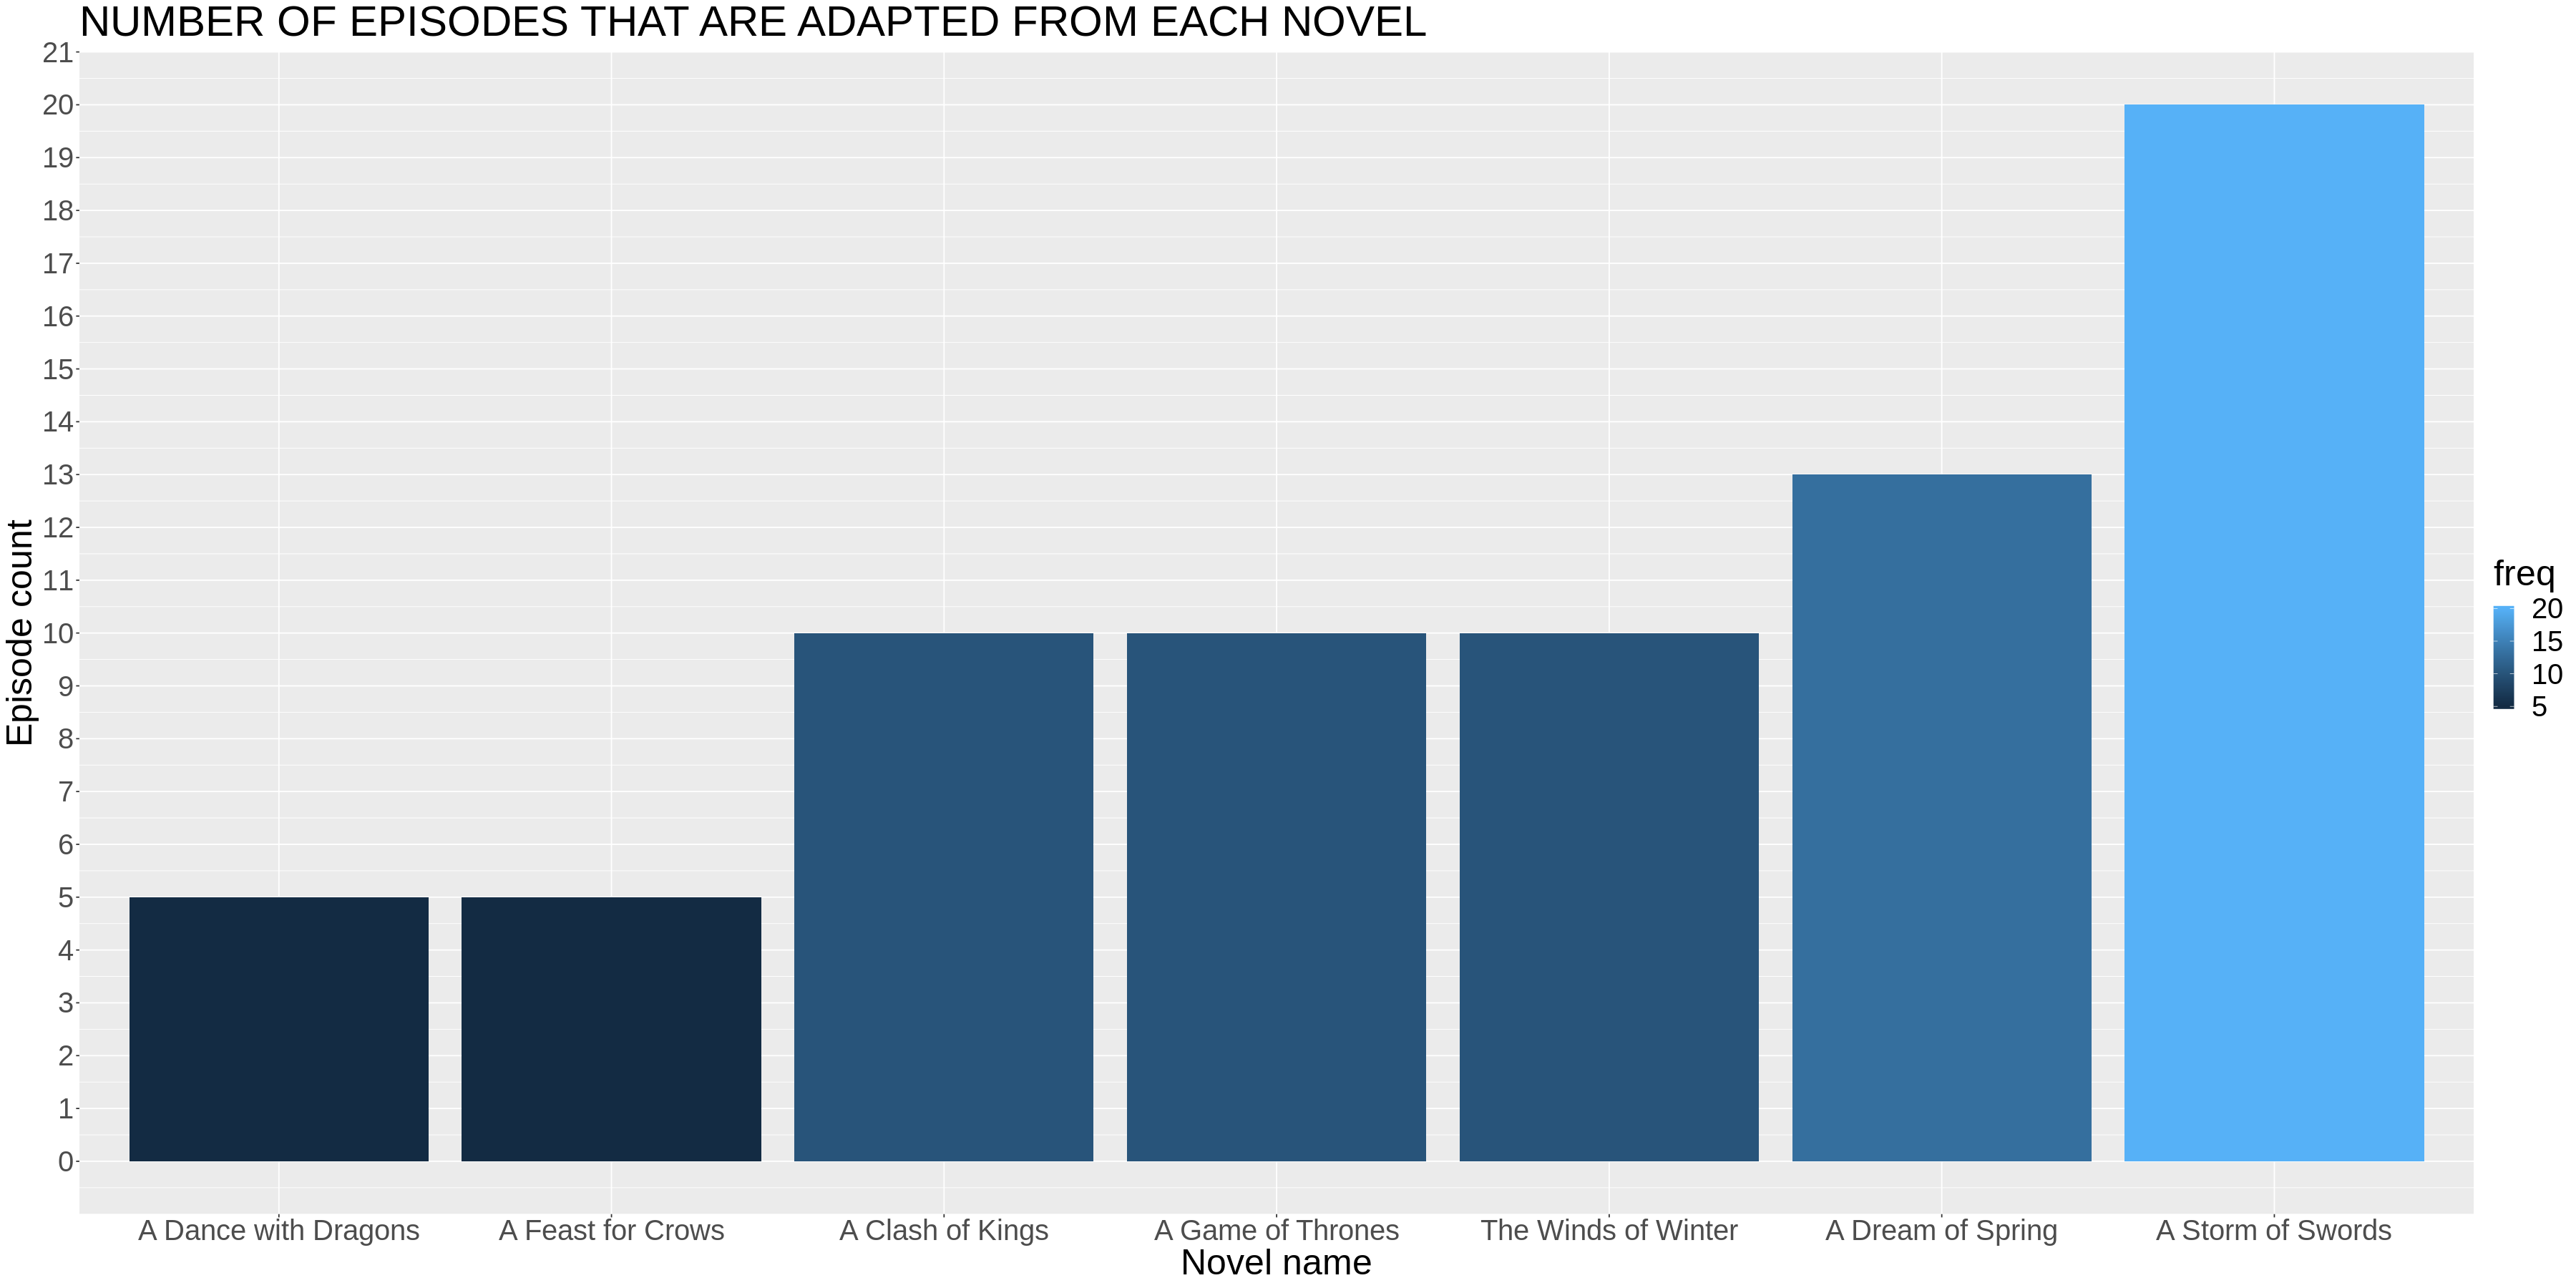

In [1037]:
options(repr.plot.width = 30, repr.plot.height = 15)
histogram2 <- got %>% 
            arrange(Episode_adapted_from_the_novel) %>%
            group_by(Episode_adapted_from_the_novel) %>%
            summarise(freq = n()) %>%
            mutate(Episode_adapted_from_the_novel = fct_reorder(Episode_adapted_from_the_novel, freq)) %>%
            ggplot(aes(x=Episode_adapted_from_the_novel, y=freq, fill=freq)) +
            geom_histogram(stat = "identity") +
            scale_y_continuous(breaks=0:21) +
            labs(x = "Novel name", y = "Episode count") +
            ggtitle("NUMBER OF EPISODES THAT ARE ADAPTED FROM EACH NOVEL")
histogram2 + theme(text = element_text(size = 30))

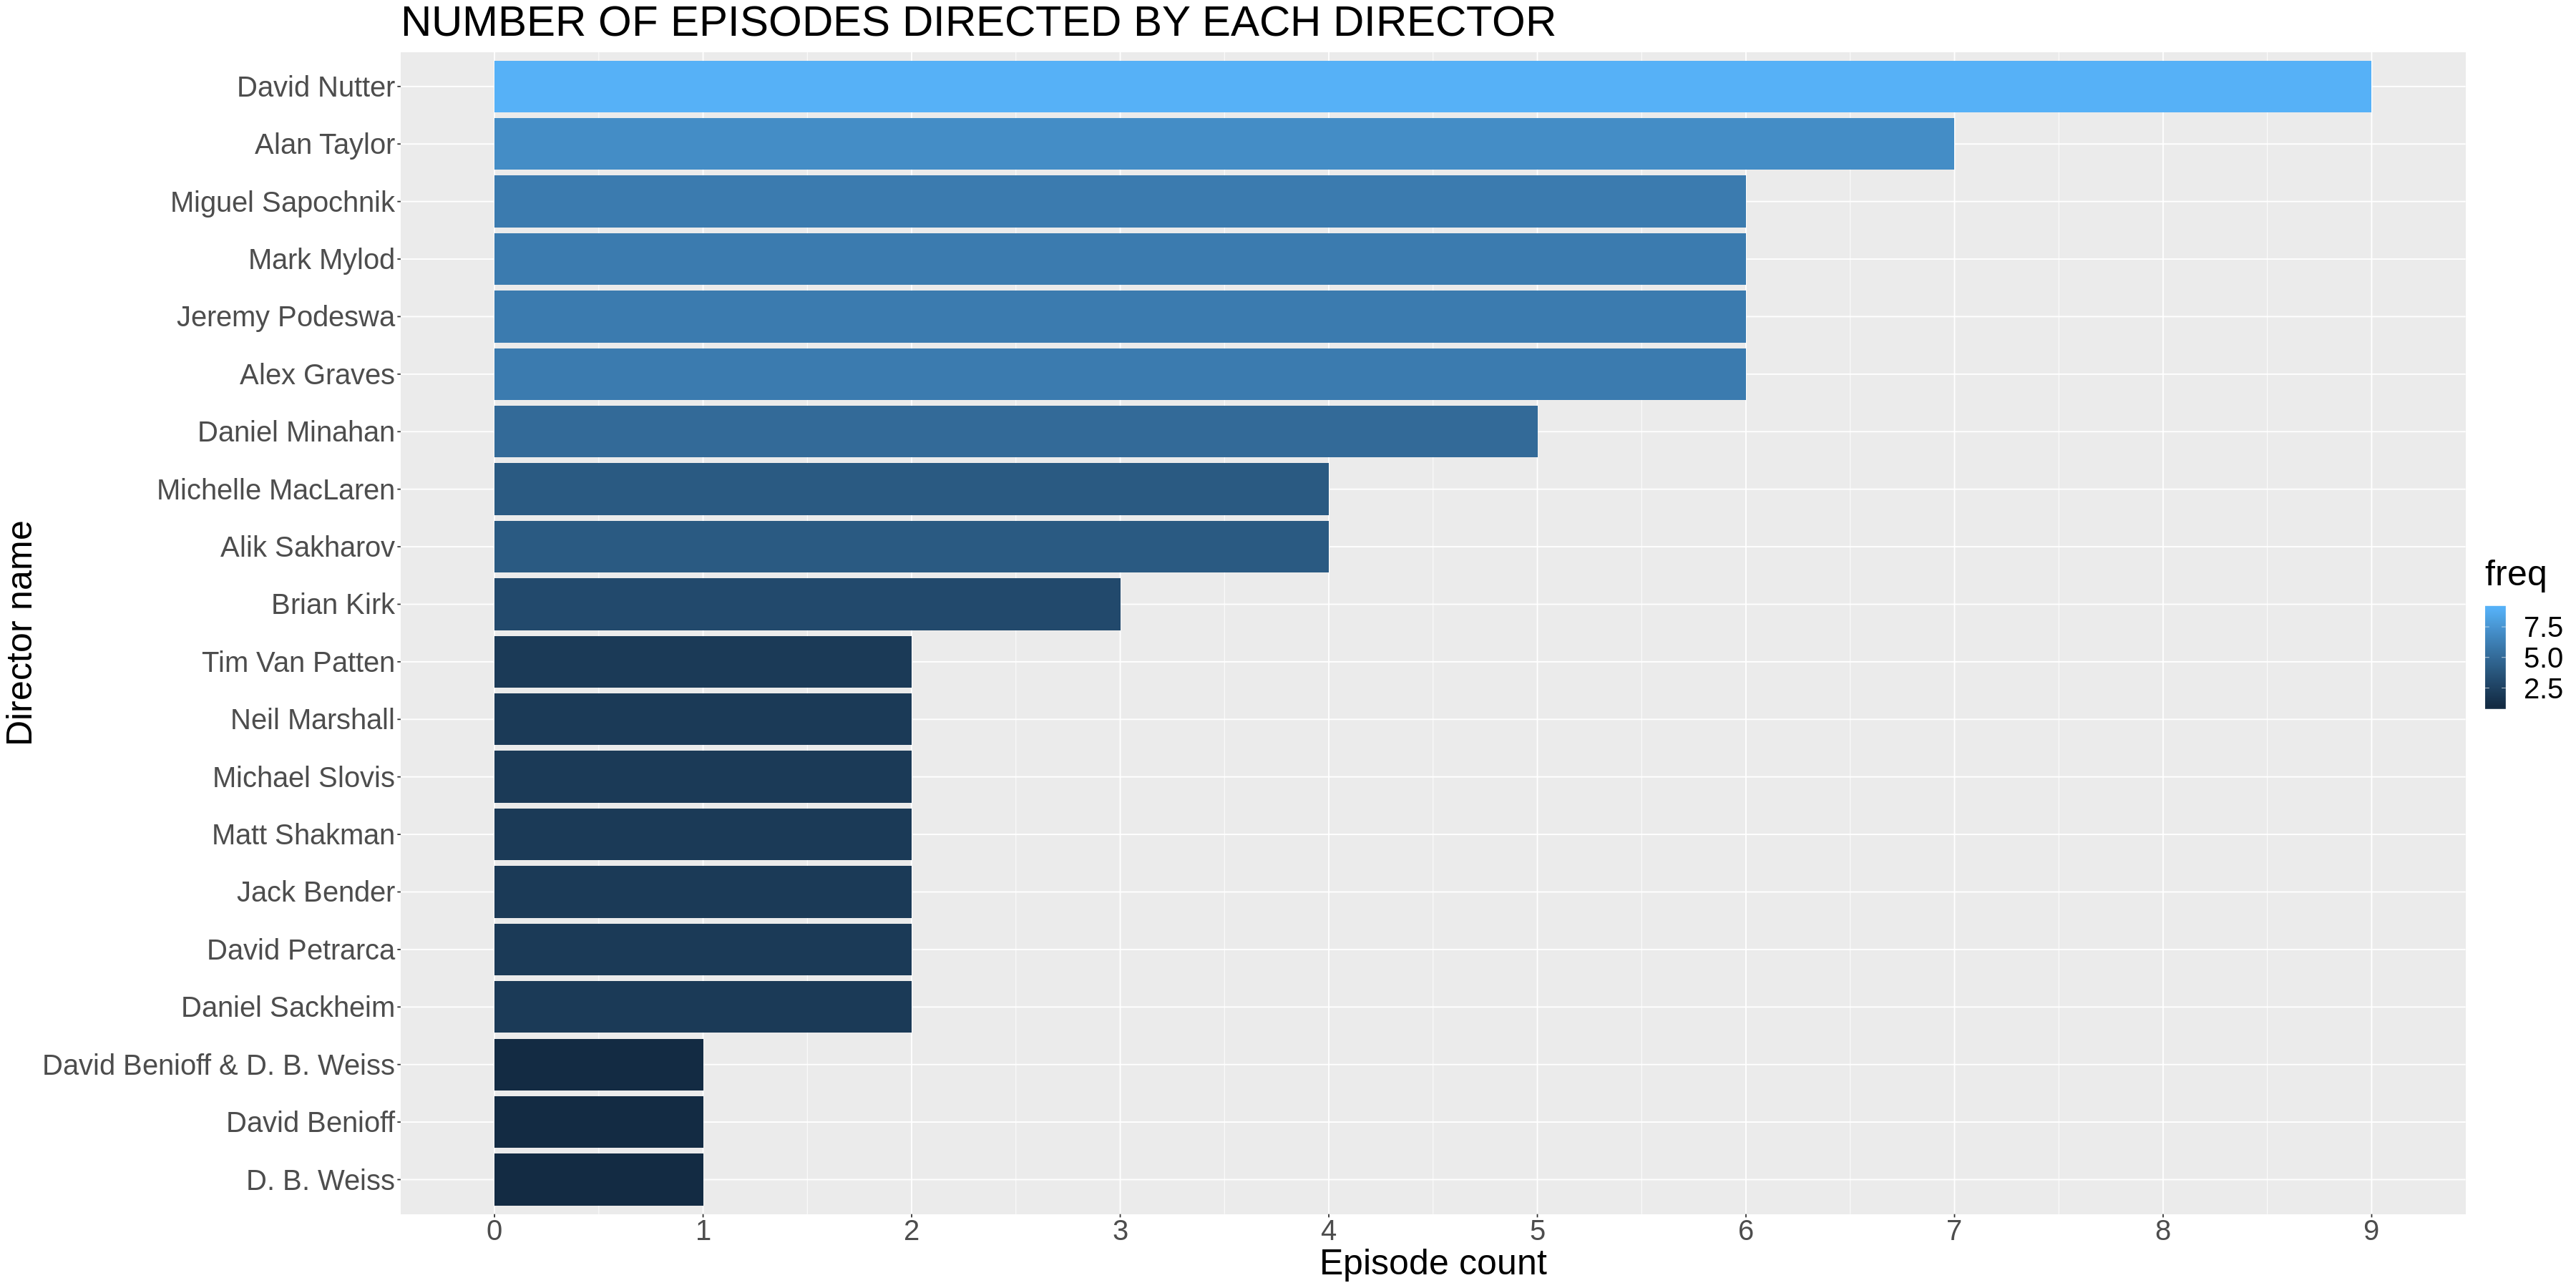

In [1038]:
options(repr.plot.width =30, repr.plot.height = 15)
bar_plot1 <-got %>% 
            arrange(Directed_by) %>%
            group_by(Directed_by) %>%
            summarise(freq = n()) %>%
            mutate(Directed_by = fct_reorder(Directed_by, freq)) %>%
            ggplot(aes(x=Directed_by, y=freq, fill=freq)) +
            geom_bar(stat = "identity") +
            scale_y_continuous(breaks=c(0,1,2,3,4,5,6,7,8,9,10)) +
            labs(x = "Director name", y = "Episode count") +
            ggtitle("NUMBER OF EPISODES DIRECTED BY EACH DIRECTOR") +
            coord_flip()
bar_plot1 + theme(text = element_text(size = 30))

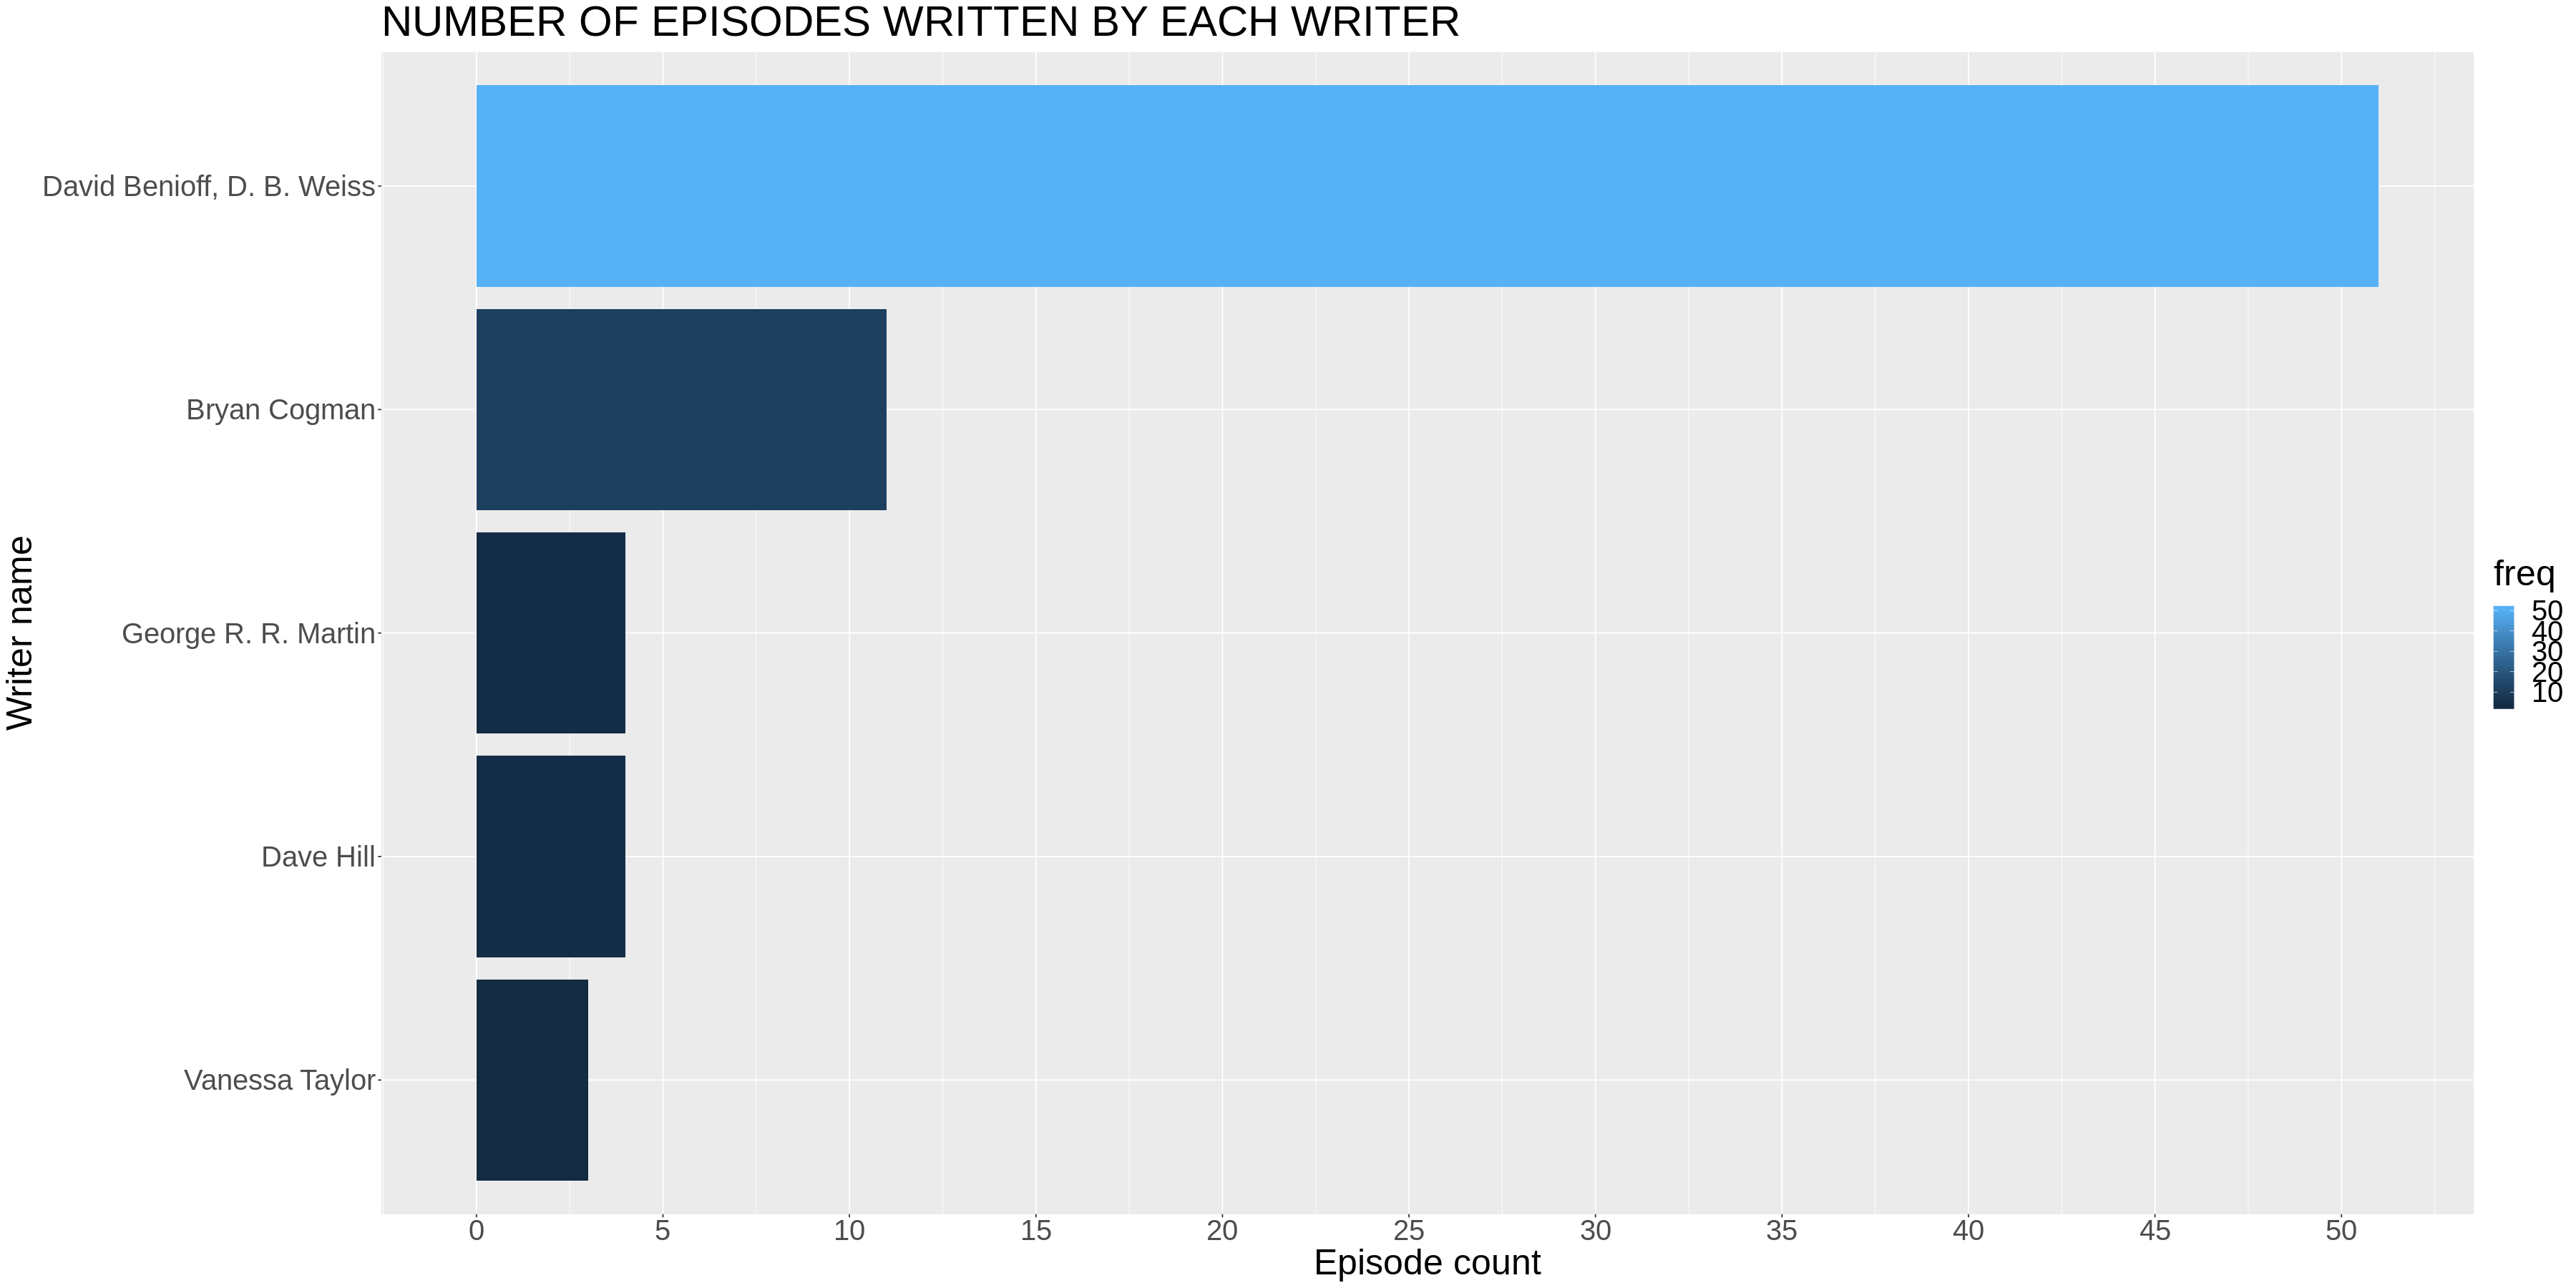

In [1039]:
options(repr.plot.width = 30, repr.plot.height = 15)
bar_plot2 <- got %>% 
            arrange(Written_by) %>%
            group_by(Written_by) %>%
            summarise(freq = n()) %>%
            mutate(Written_by = fct_reorder(Written_by, freq)) %>%
            ggplot(aes(x=Written_by, y=freq, fill=freq)) +
            geom_bar(stat = "identity") +
            scale_y_continuous(breaks=c(0,5,10,15,20,25,30,35,40,45,50)) +
            labs(x = "Writer name", y = "Episode count") +
            ggtitle("NUMBER OF EPISODES WRITTEN BY EACH WRITER") +
            coord_flip()
bar_plot2 + theme(text = element_text(size = 30)) 

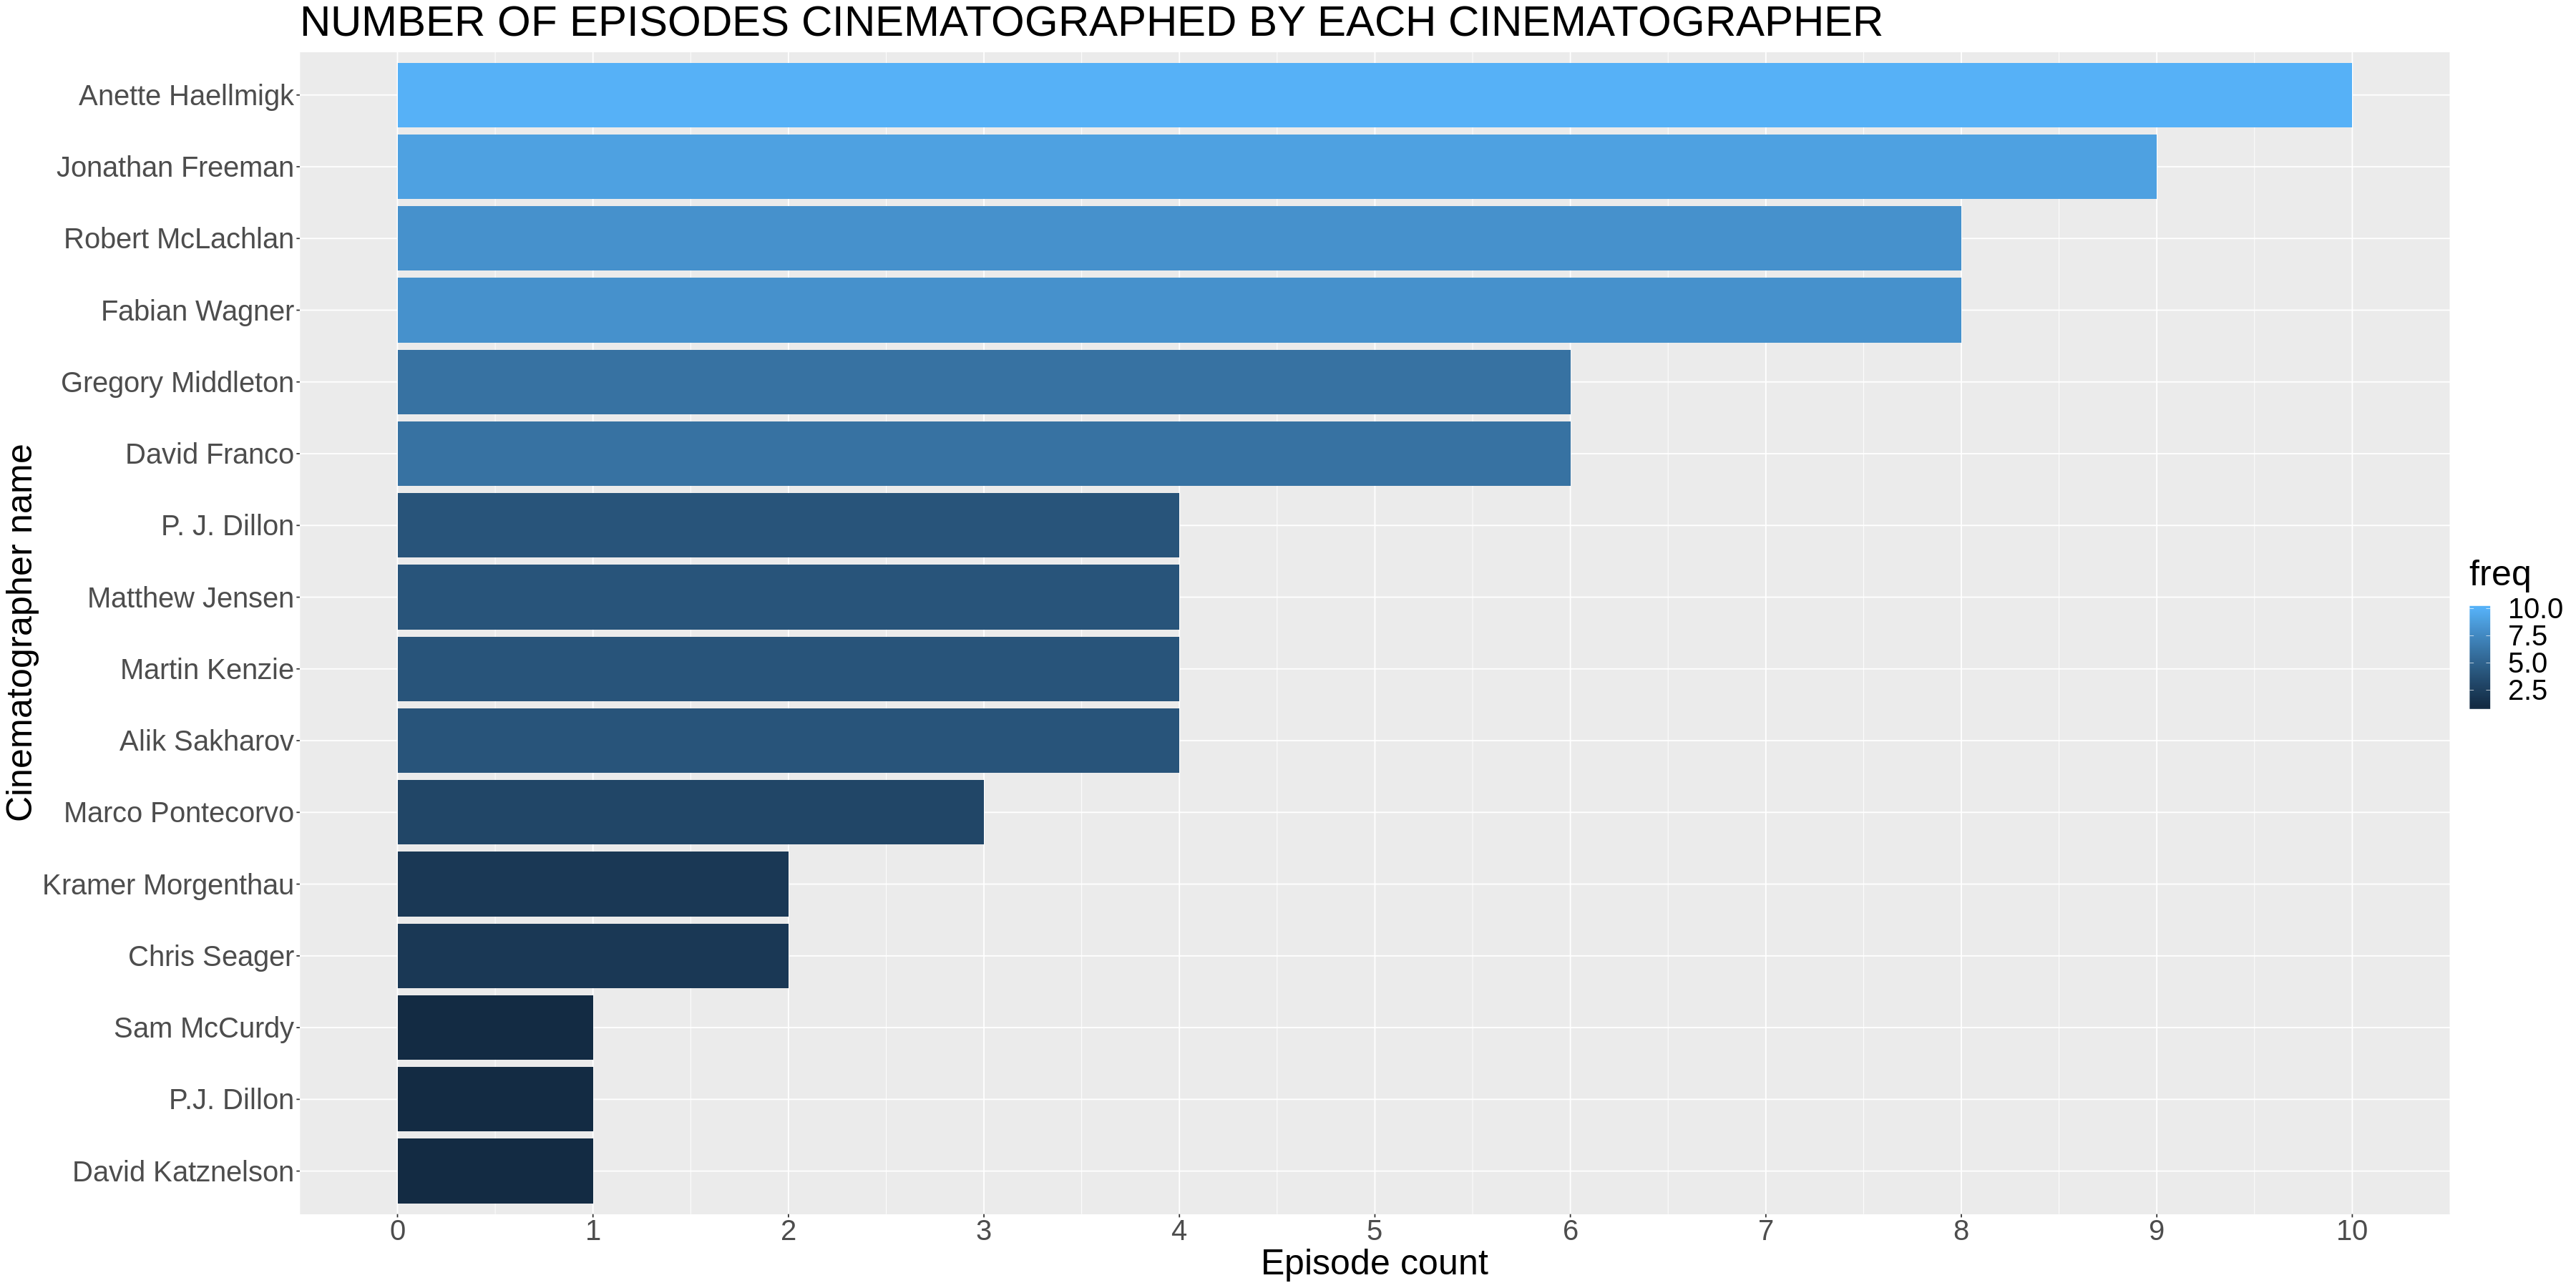

In [1040]:
options(repr.plot.width = 30, repr.plot.height = 15)
bar_plot3 <- got %>% 
            arrange(Cinematographed_by) %>%
            group_by(Cinematographed_by) %>%
            summarise(freq = n()) %>%
            mutate(Cinematographed_by = fct_reorder(Cinematographed_by, freq)) %>%
            ggplot(aes(x=Cinematographed_by, y=freq, fill=freq)) +
            geom_bar(stat = "identity") +
            scale_y_continuous(breaks=c(0,1,2,3,4,5,6,7,8,9,10)) +
            labs(x = "Cinematographer name", y = "Episode count") +
            ggtitle("NUMBER OF EPISODES CINEMATOGRAPHED BY EACH CINEMATOGRAPHER") +
            coord_flip()
bar_plot3 + theme(text = element_text(size = 30))

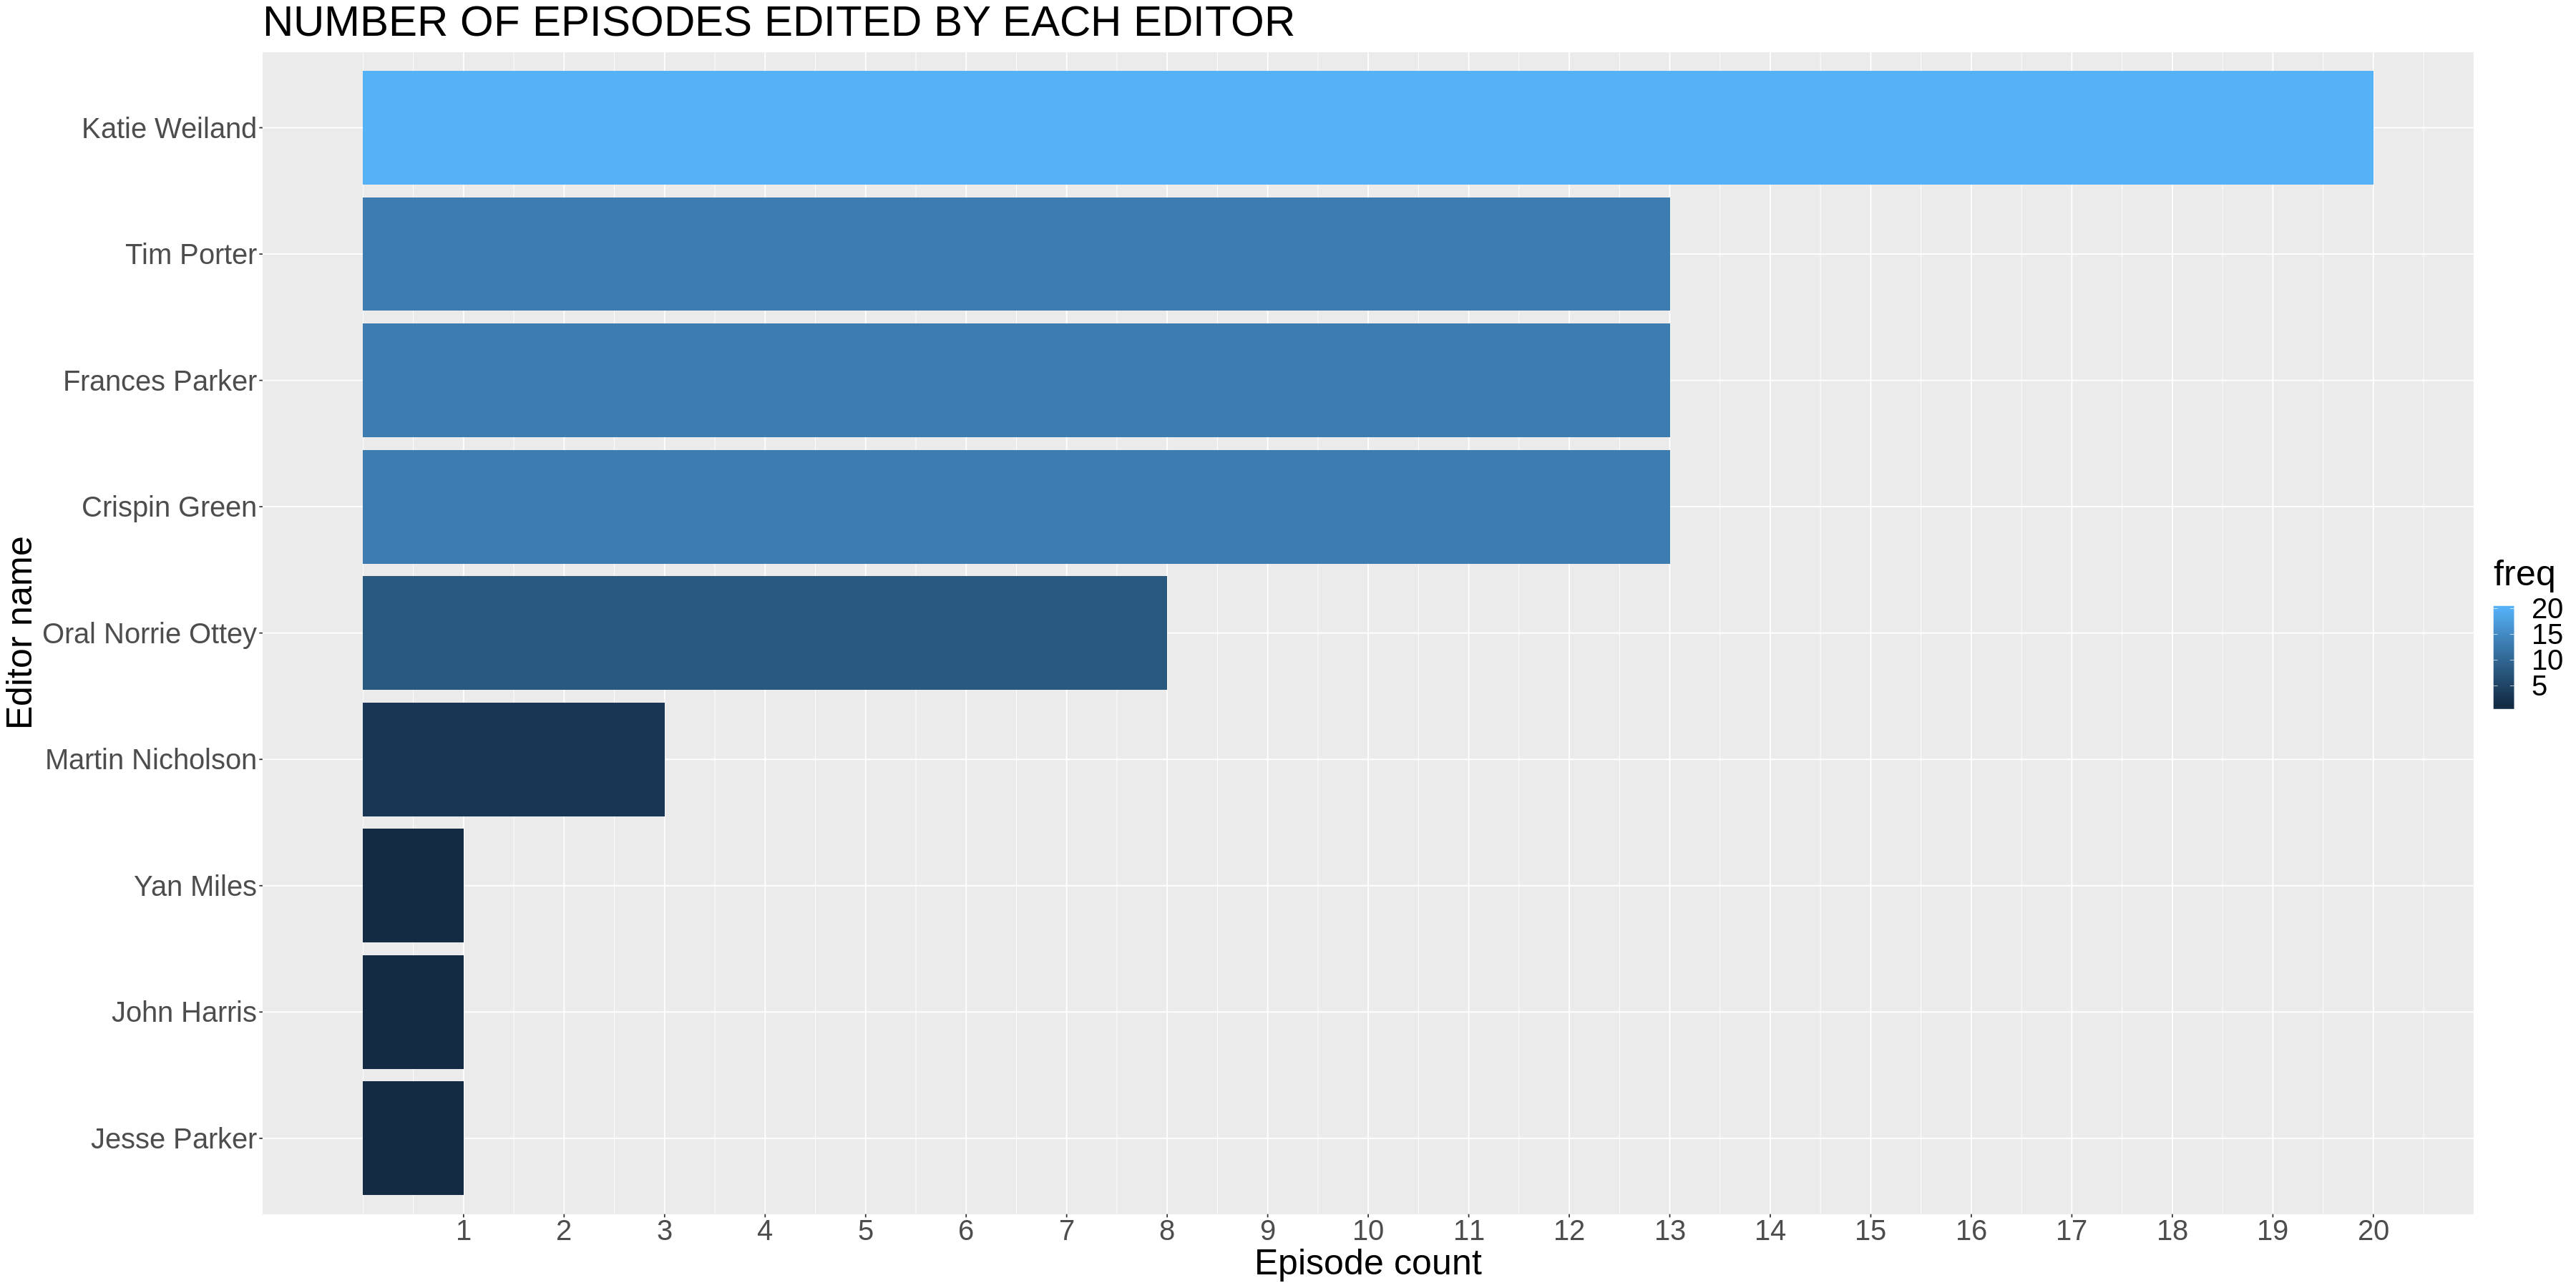

In [1041]:
options(repr.plot.width = 30, repr.plot.height = 15)
bar_plot4 <- got %>% 
            arrange(Edited_by) %>%
            group_by(Edited_by) %>%
            summarise(freq = n()) %>%
            mutate(Edited_by = fct_reorder(Edited_by, freq)) %>%
            ggplot(aes(x=Edited_by, y=freq, fill=freq)) +
            geom_bar(stat = "identity") +
            scale_y_continuous(breaks=1:20) +
            labs(x = "Editor name", y = "Episode count") +
            ggtitle("NUMBER OF EPISODES EDITED BY EACH EDITOR") +
            coord_flip()
bar_plot4 + theme(text = element_text(size = 30)) 

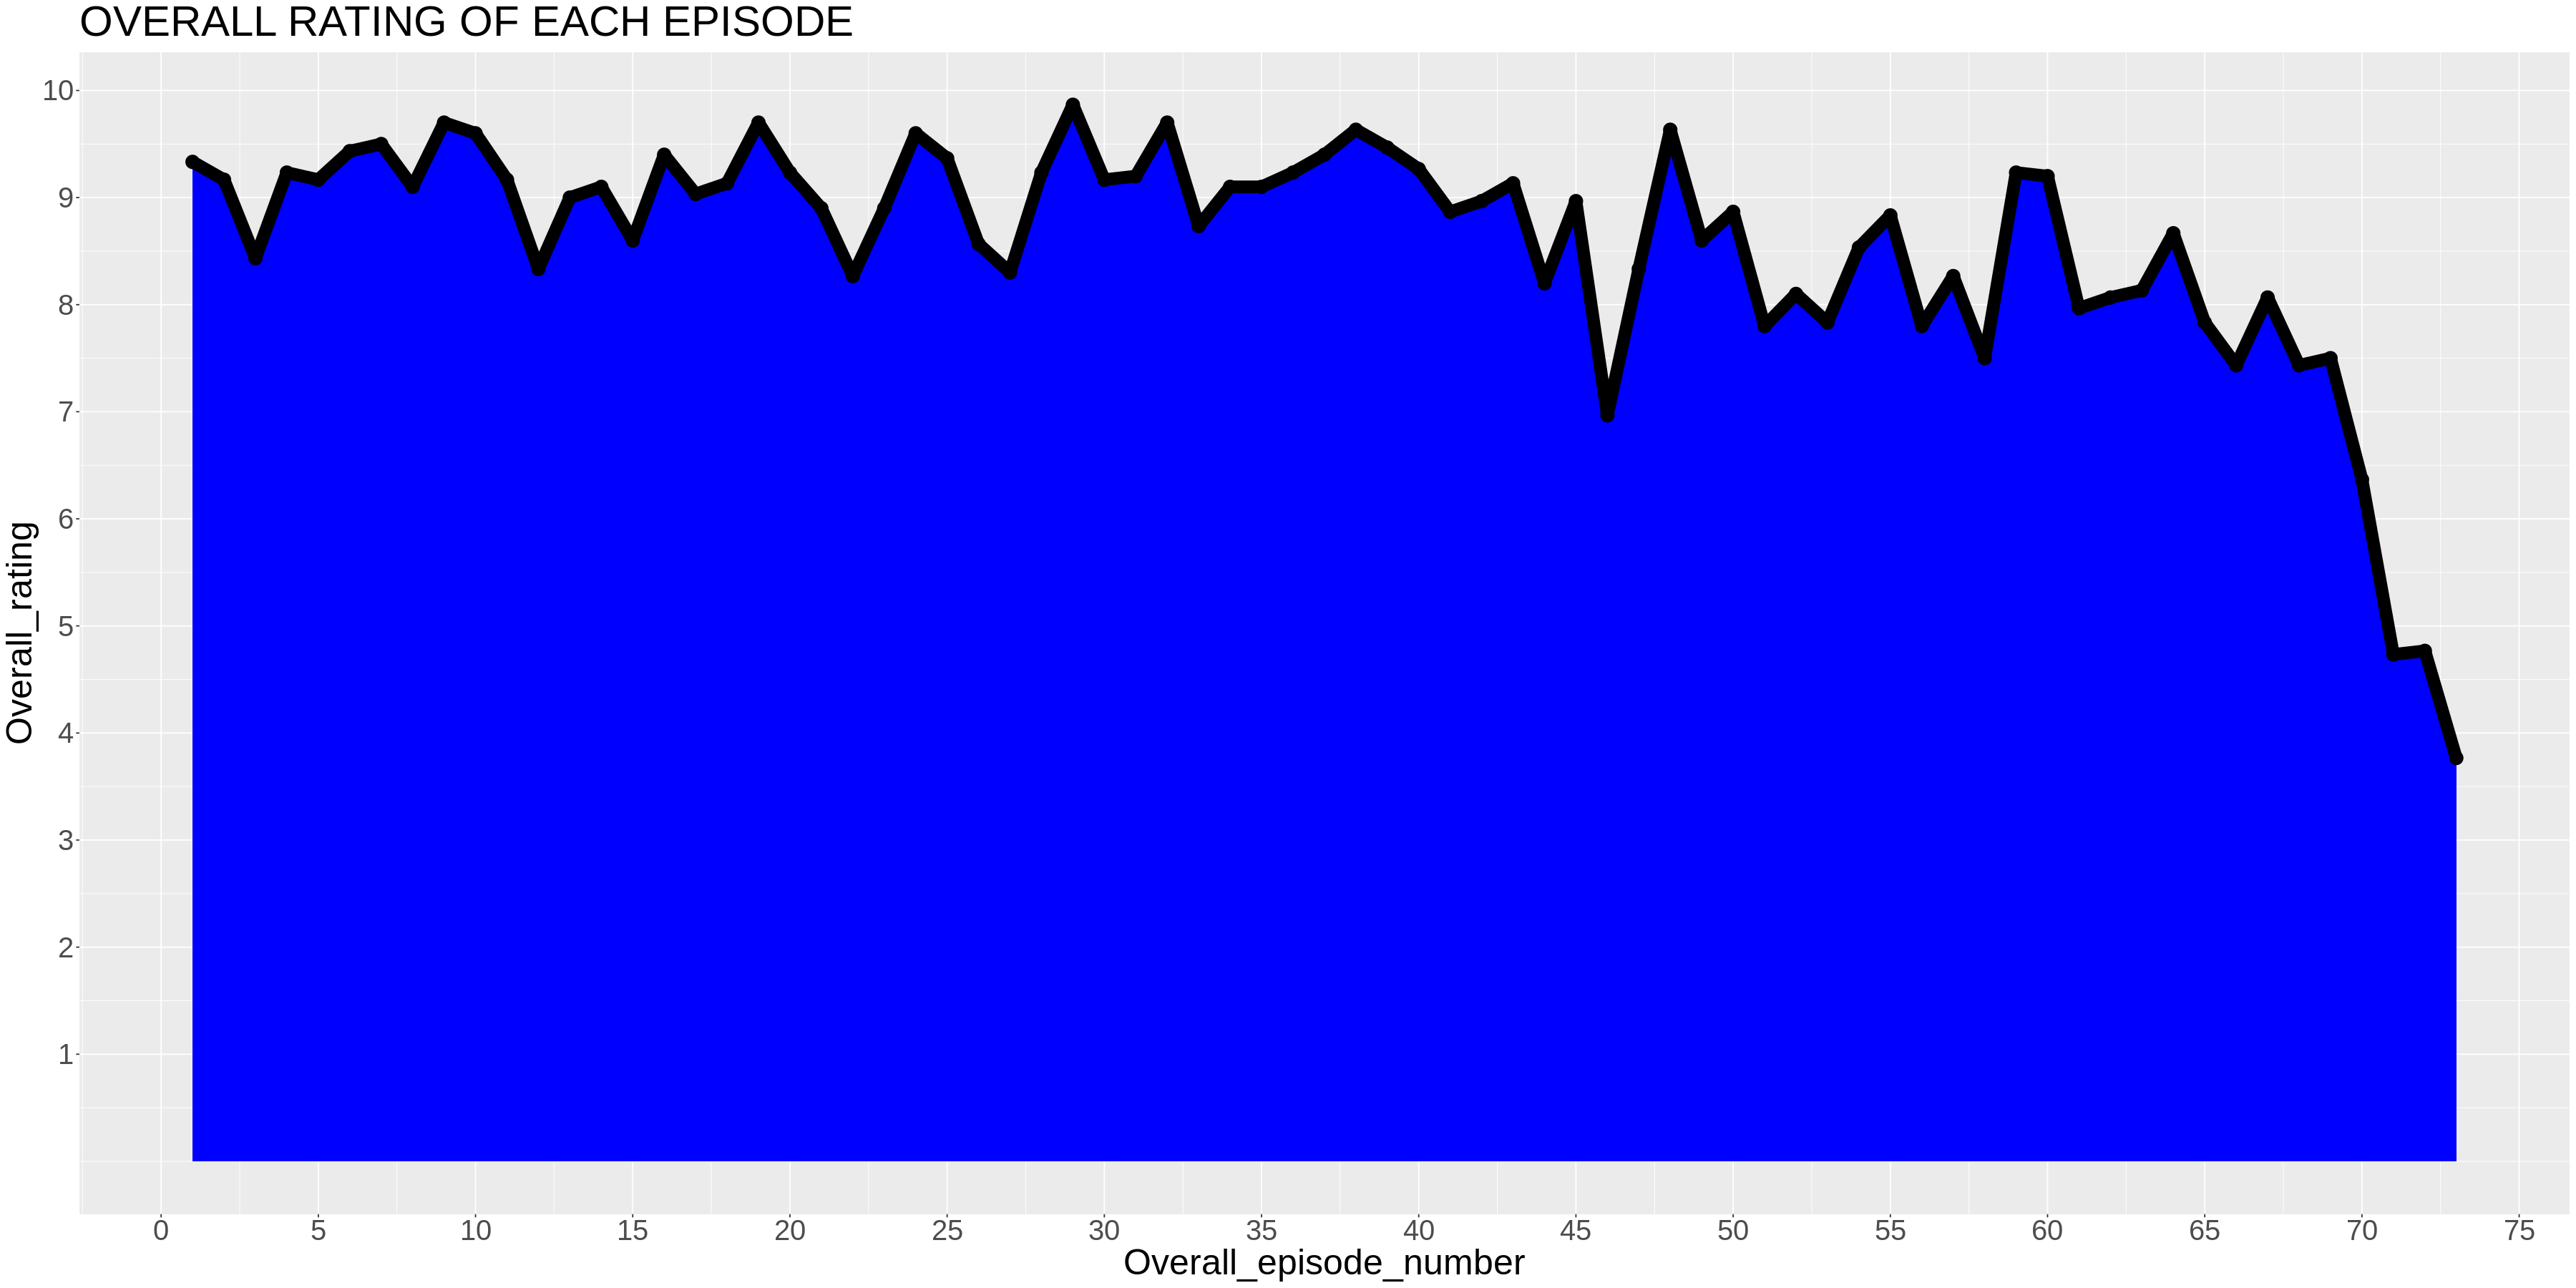

In [1042]:
options(repr.plot.width = 30, repr.plot.height = 15)
area_chart1 <- got %>%
                ggplot(aes(x=Overall_episode_number, y=Overall_rating)) +
                geom_area(size=5, fill="blue") +
                geom_line(size=5) +
                geom_point(size=5) +
                scale_x_continuous(breaks=c(0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75)) +
                scale_y_continuous(breaks=1:10) +
                ggtitle("OVERALL RATING OF EACH EPISODE")
area_chart1 + theme(text = element_text(size = 30))

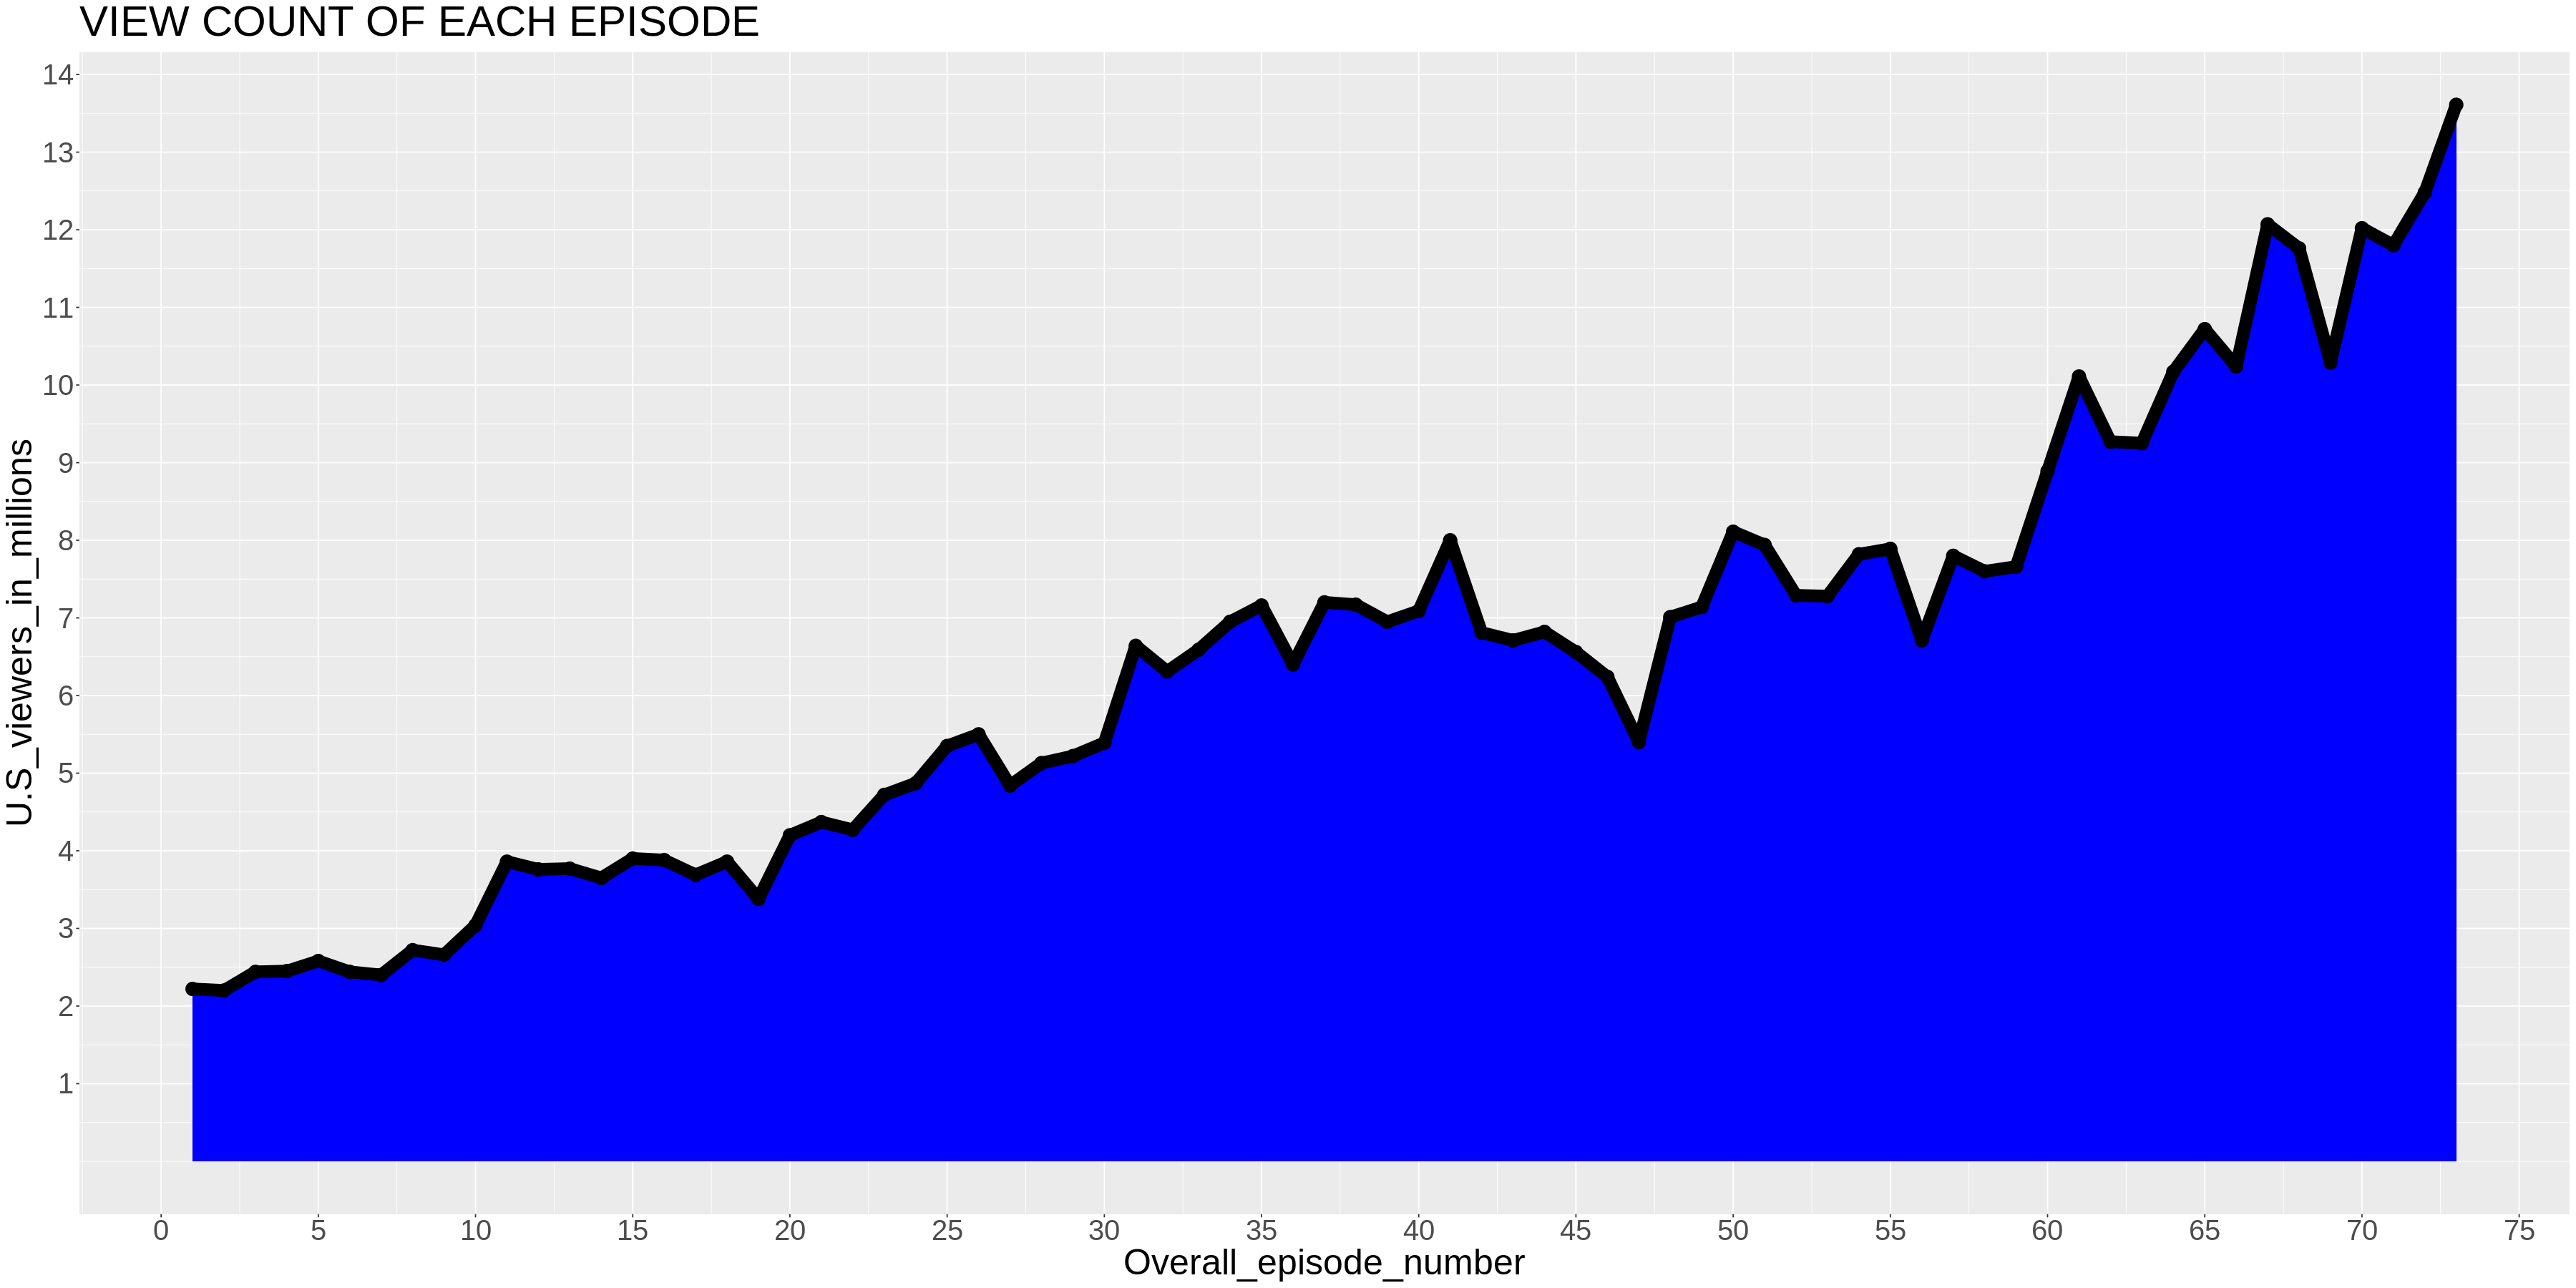

In [1043]:
options(repr.plot.width = 30, repr.plot.height = 15)
area_chart2 <- got %>%
                ggplot(aes(x=Overall_episode_number, y=U.S_viewers_in_millions)) +
                geom_area(size=5, fill="blue") +
                geom_line(size=5) +
                geom_point(size=5) +
                scale_x_continuous(breaks=c(0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75)) +
                scale_y_continuous(breaks=1:15) +
                ggtitle("VIEW COUNT OF EACH EPISODE")
area_chart2 + theme(text = element_text(size = 30))

# SUMMARY

### Game of Thrones is probably the most popular TV series of all time, and my project report is about the analysis of this TV series. My reports includes the details of the crew members and the rating received by the show throughout its run from April 17, 2011 to May 19, 2019.
### Game of Thrones is an American fantasy drama television series created by David Benioff and D. B. Weiss for HBO. It is an adaptation of A Song of Ice and Fire, a series of fantasy novels by George R. R. Martin.
### It premiered on April 17, 2011, and concluded on May 19, 2019, with 73 episodes broadcasted over eight seasons, and has received 59 Primetime Emmy Awards, the most by a drama series.
### The series has a total of 18 directors, 7 writers, 9 editors, 16 cinematographers, and 1 music composer. The runtime of each episode lies between 50–82 minutes and was shot in the United Kingdom, Canada, Croatia, Iceland, Malta, Morocco, and Spain.

---

# Common Pitfalls / Inefficiencies

**BEFORE you submit your end product, pay attention to the following and check your visualizations and story accordingly:**

---

### - Remember the design analysis questions:

**what, how, who, why?** 

- What are you showing/telling? 
- How are you going to show it (efficiency? visual tasks like comparison, trends, query, etc.) 
- Who is your audience? Why should they care about what you have to tell? What are the **actionable** information they can take from your story? 
- Why are you telling the story? What is your angle, message, point? (make it clear in text AND visuals) 

---

### - Pay attention to the color schemes/palettes:

 - Do NOT use sequential palettes for data attributes that have no ordering.
 - Do NOT use qualitative color schemes for attributes where order matters. 

---

###  - Color coordinate among plots so that the same data attributes have the same color in all plots:

You can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value (especially important for categories). Do not change color of the same category among plots!

---

###  - Perceptual grouping is important! group and/or order values:

People tend to make sense of things and compare better when they are ordered or grouped:  

- In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

- Pie chart: order wedges. 

- In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 

---

### - No lengthy text in x axis:

- **Flip** the axes of a bar chart so that character values (text) are **readable on the y axis** left to right, 

**or** 

- at least, put them slanted in x axis for better readibility. 

---

### - Plot only those data columns and/or subsets that tell an obvious story:

 - **No crowded** scatter plots with useless linear regression lines that don't tell anything.  
 - You do **NOT** have to plot **ALL** your data (most of the time, you should not). 
 - Look at alternative plots to tell your story effectively. 
 - Your plots should be perceived easily and intuitively. 
  
  

---

### - If you have too many classes (discrete variables/categories), try to GROUP them:

- Instead of giving a color to each of the dozen or so categories, you can put them in meaningful groups and color code to reduce clutter. 

- For sequential variables, you can do the same thing by **binning** numbers into bins (like in a histogram). 

- **Stepped color palettes** may be more useful than smooth sequential palettes (especially for comparison in choropleth maps) for a large range of values in an attribute. 

- You can **group/cluster data into meaningful chunks** and display those as bubble charts, networks, geographical regions, etc. 

- Do **NOT** dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be **perceived immediately**. 

---

### - ANNOTATE! ANNOTATE! ANNOTATE!

- **Tell** your audience what they are supposed to see. 

- Use **meaningful** titles with a message/statement, no dry titles. 

- Use nice and concise axis labels (make sure they are large enough).

- Use text annotations (look at the **examples in the lab notebook**).

---

### - THEMING

- **Good looking** charts are more **convincing**! Your audience will have more confidence in your work. 

- **Almost NEVER use the default color palette, default theme, or default fonts.**

- Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 











---

### - Use space wisely!

- **Balance the plots** to use space effectively.

- Pay attention to **data-ink ratio**.

- **HAVE A FLOW left to right, top to bottom**. 

- If you must have a line plot or bar plot with a lot of empty space, try to put text annotations with relevant information in them. 